## Task 1: Naive Compositing (10 pts)
Implement a function naiveComposite(bg, fg, mask, y, x) that simply copies the pixel values from an image fg into a target bg when mask is equal to 1. fg is assumed to be smaller than bg and has the same size as mask. y and x specify where the upper left corner of fg goes in the source image
bg.

In [5]:
from IPython.display import Image
import numpy as np
import cv2
from lib.display_helper import *

def naive_composite(bg, fg, mask, y, x):
    bmask = mask.astype(np.bool)
    output = bg.copy()
    (fh,fw,fc) = fg.shape
    output[y:y+fh,x:x+fw][bmask] = fg[bmask]
    return output

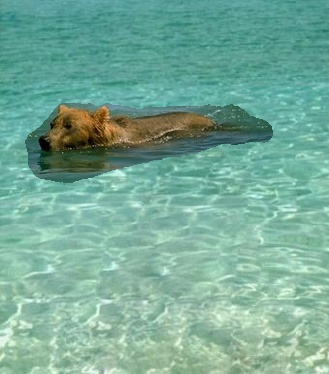

In [6]:
bg_img = cv2.imread('data/waterpool.png')
fg_img = cv2.imread('data/bear.png')
mask_img = cv2.imread('data/mask.png')

output = naive_composite(bg_img, fg_img, mask_img, 50, 0)
output_path = 'output/naive.jpg'
cv2.imwrite(output_path, output)

Image(output_path)

## Task 2: Poisson Gradient Descent (40)
Write a function Poisson(bg, fg, mask, niter) implements gradient descent to solve for Poisson image compositing. bg, fg, and mask are assumed to have the same size.

Implement a Laplacian operator and a dot product for images functions. 

Test this function on the small inputs because it is slow to converge. I highly recommend the provided testRamp which seeks to paste a flat source into a background composed of a greyscale ramp. Input and in the first row, and x0, x50, x100, x200.

In [303]:
from scipy.ndimage.filters import laplace

# scipy.ndimage.filters.laplace
# np.dot

def poisson(bg, fg, mask, max_it):
    if not (bg.shape == fg.shape and fg.shape == mask.shape):
        raise NotImplementedError("Implemented only for equal shapes")
        
    bmask = mask.astype(np.bool)
    
    b = laplace(fg*bmask).astype(np.float64)
    x = bg.astype(np.float64)
    x[bmask] = 0.0
    for iteration in range(max_it):
        Ax = laplace(x)
        r = b - Ax
        r_flat = r.flatten()
        Ar_flat = laplace(r).flatten()
        alpha = np.dot(r_flat, r_flat) / np.dot(r_flat, Ar_flat)
        x = x + (r*bmask)*alpha
        
    return x.clip(0,255).astype(bg.dtype)

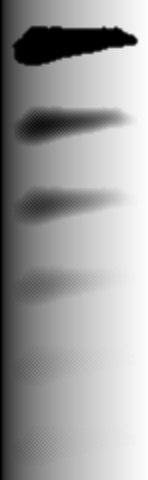

In [304]:
bg = cv2.imread('data/ramp.png')
fg = cv2.imread('data/fg.png')
mask = cv2.imread('data/mask3.png')


outputs = []
outputs.append([cv2.resize(poisson(bg, fg, mask, 1),(148,80))])
outputs.append([cv2.resize(poisson(bg, fg, mask, 50),(148,80))])
outputs.append([cv2.resize(poisson(bg, fg, mask, 100),(148,80))])
outputs.append([cv2.resize(poisson(bg, fg, mask, 200),(148,80))])
outputs.append([cv2.resize(poisson(bg, fg, mask, 400),(148,80))])
outputs.append([cv2.resize(poisson(bg, fg, mask, 800),(148,80))])

output_path = 'output/poisson_gradient_descent_ramp.jpg'
cv2.imwrite(output_path, multiple_display(outputs))

Image(output_path)

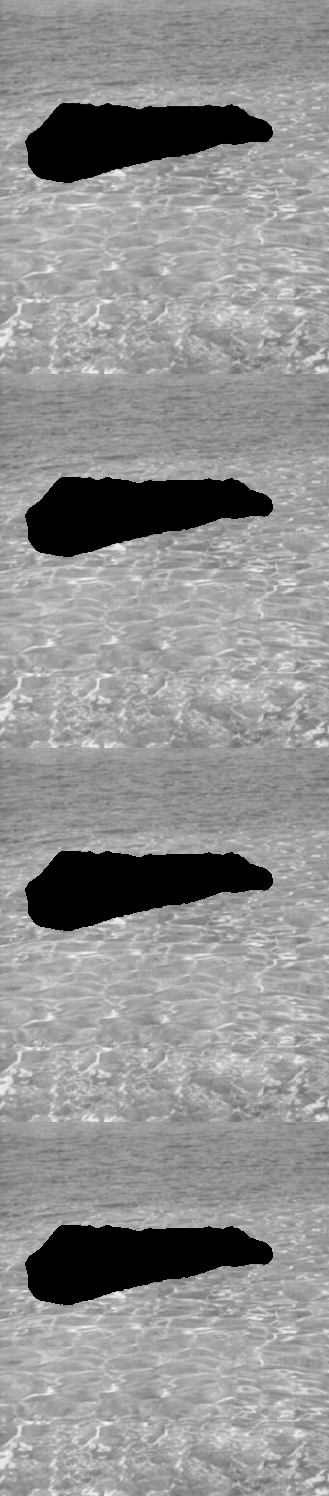

In [309]:
bg = cv2.imread('data/waterpool.png')[...,0]
_fg = cv2.imread('data/bear.png')[...,0]
fg = np.zeros_like(bg)
fg[50:50+_fg.shape[0],:_fg.shape[1]] = _fg
_mask = cv2.imread('data/mask.png')[...,0]
mask = np.zeros_like(bg)
mask[50:50+_mask.shape[0],:_mask.shape[1]] = _mask


outputs = []
outputs.append([poisson(bg, fg, mask, 1)])
outputs.append([poisson(bg, fg, mask, 10)])
#outputs.append([poisson(bg, fg, mask, 20)])
#outputs.append([poisson(bg, fg, mask, 30)])
#outputs.append([poisson(bg, fg, mask, 40)])
outputs.append([poisson(bg, fg, mask, 50)])
outputs.append([poisson(bg, fg, mask, 200)])
#outputs.append([poisson(bg, fg, mask, 2000)])
#outputs.append([poisson(bg, fg, mask, 5000)])
#outputs.append([poisson(bg, fg, mask, 10000)])

output_path = 'output/poisson_GD_bear.png'
cv2.imwrite(output_path, multiple_display(outputs))

Image(output_path)

In [310]:
for o in outputs:
    print o[0][mask.astype(np.bool)]

[130   4   0 ...,   0   0 102]
[33  0  0 ...,  0  0 50]
[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
